In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
arquivo_excel = 'vendas_distribuidoras_anp.xlsx'

In [3]:
df = pd.ExcelFile(arquivo_excel)

In [4]:
dataframes = {}

In [5]:
abas_desejadas = ['diesel', 'gasolina', 'etanol']

In [6]:
for aba in abas_desejadas:
    dataframes[aba] = pd.read_excel(arquivo_excel, sheet_name=aba)

In [7]:
print(dataframes['diesel'])
#print(dataframes['gasolina'])
#print(dataframes['etanol'])

    regiao  meses         2000         2001         2002         2003  \
0       df      1    23310.896    29319.999    30934.830    29295.326   
1       df      2    25967.743    27720.714    27585.412    28328.216   
2       df      3    24590.674    32149.816    32724.180    28047.691   
3       df      4    24975.963    32156.821    33863.218    31787.357   
4       df      5    27224.597    34122.639    34484.371    32476.371   
..     ...    ...          ...          ...          ...          ...   
103     br      8  3182949.584  3456504.423  3302889.499  3234107.777   
104     br      9  3010822.732  3208521.082  3265195.464  3350136.350   
105     br     10  3150899.551  3455040.138  3683701.381  3563090.189   
106     br     11  3086396.797  3261714.970  3124956.731  3105640.803   
107     br     12  2816038.586  2828623.186  2947422.934  3090922.565   

            2004         2005         2006          2007  ...          2011  \
0      24360.754    27745.916    28110.059  

In [8]:
print(dataframes['diesel'].info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 108 entries, 0 to 107
Data columns (total 23 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   regiao  108 non-null    object 
 1   meses   108 non-null    int64  
 2   2000    108 non-null    float64
 3   2001    108 non-null    float64
 4   2002    108 non-null    float64
 5   2003    108 non-null    float64
 6   2004    108 non-null    float64
 7   2005    108 non-null    float64
 8   2006    108 non-null    float64
 9   2007    108 non-null    float64
 10  2008    108 non-null    float64
 11  2009    108 non-null    float64
 12  2010    108 non-null    float64
 13  2011    108 non-null    float64
 14  2012    108 non-null    float64
 15  2013    108 non-null    float64
 16  2014    108 non-null    float64
 17  2015    108 non-null    float64
 18  2016    108 non-null    float64
 19  2017    108 non-null    float64
 20  2018    108 non-null    float64
 21  2019    108 non-null    float64
 22  20

In [9]:
df_diesel = dataframes['diesel'].melt(id_vars=['regiao', 'meses'], var_name='ano', value_name='valor')
df_gasolina = dataframes['gasolina'].melt(id_vars=['regiao', 'meses'], var_name='ano', value_name='valor')
df_etanol = dataframes['etanol'].melt(id_vars=['regiao', 'meses'], var_name='ano', value_name='valor')


In [10]:
df_diesel['tipo'] = 'diesel'
df_gasolina['tipo'] = 'gasolina'
df_etanol['tipo'] = 'etanol'

In [11]:
#print(df_diesel)
#print(df_gasolina)
print(df_etanol)

     regiao  meses   ano        valor    tipo
0        df      1  2000    11687.930  etanol
1        df      2  2000    13407.993  etanol
2        df      3  2000    13389.184  etanol
3        df      4  2000    12680.955  etanol
4        df      5  2000    13046.814  etanol
...     ...    ...   ...          ...     ...
2263     br      8  2020  1569803.325  etanol
2264     br      9  2020  1700749.710  etanol
2265     br     10  2020  1871664.946  etanol
2266     br     11  2020  1704279.537  etanol
2267     br     12  2020  1936374.559  etanol

[2268 rows x 5 columns]


In [12]:
df_total = pd.concat([df_diesel, df_gasolina,df_etanol], ignore_index=True)
df_total['valor'] = df_total['valor'].round(0)
print(df_total)

     regiao  meses   ano      valor    tipo
0        df      1  2000    23311.0  diesel
1        df      2  2000    25968.0  diesel
2        df      3  2000    24591.0  diesel
3        df      4  2000    24976.0  diesel
4        df      5  2000    27225.0  diesel
...     ...    ...   ...        ...     ...
6799     br      8  2020  1569803.0  etanol
6800     br      9  2020  1700750.0  etanol
6801     br     10  2020  1871665.0  etanol
6802     br     11  2020  1704280.0  etanol
6803     br     12  2020  1936375.0  etanol

[6804 rows x 5 columns]


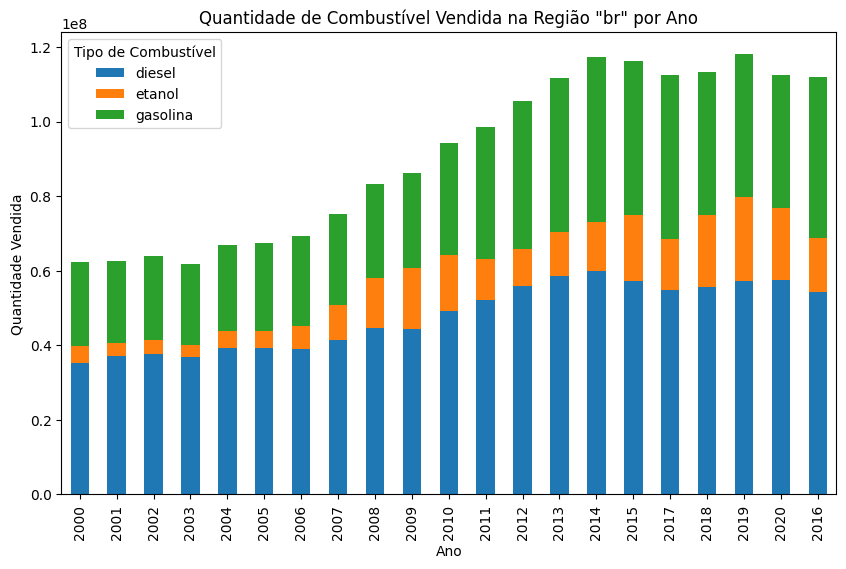

In [13]:
#Filtrar os dados para a região 'br'
df_br = df_total[df_total['regiao'] == 'br']

aggregated_data = df_br.groupby(['ano', 'tipo'])['valor'].sum().unstack().fillna(0)

aggregated_data.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Ano')
plt.ylabel('Quantidade Vendida')
plt.title('Quantidade de Combustível Vendida na Região "br" por Ano')
plt.legend(title='Tipo de Combustível')
plt.show()

In [14]:
# Filtrar os dados para excluir a região 'br'
df = df_total[df_total['regiao'] != 'br']

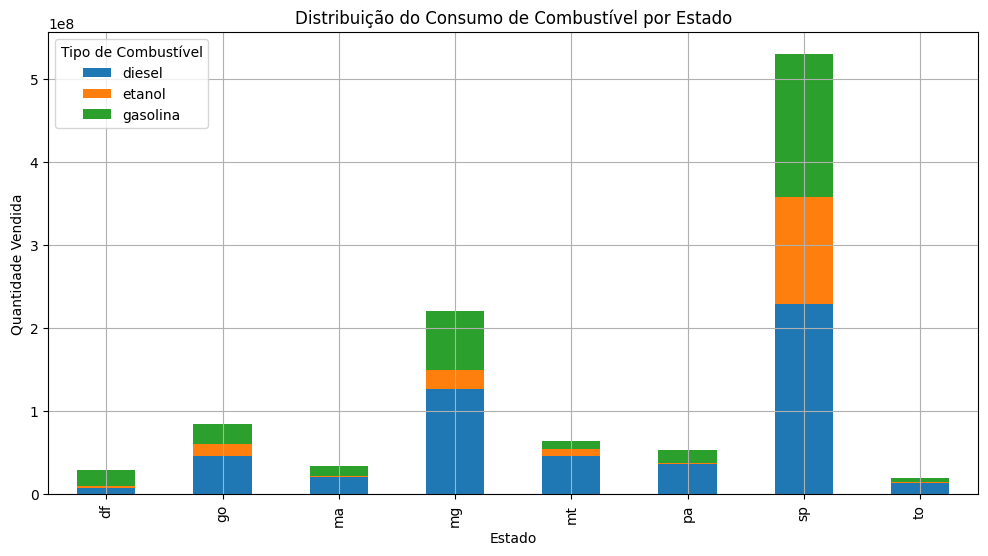

In [15]:
#Distribuição do consumo de cada tipo de combustível por estado
pivot_table = pd.pivot_table(df, values='valor', index='regiao', columns='tipo', aggfunc='sum')
pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Estado')
plt.ylabel('Quantidade Vendida')
plt.title('Distribuição do Consumo de Combustível por Estado')
plt.legend(title='Tipo de Combustível')
plt.grid(True)
plt.show()

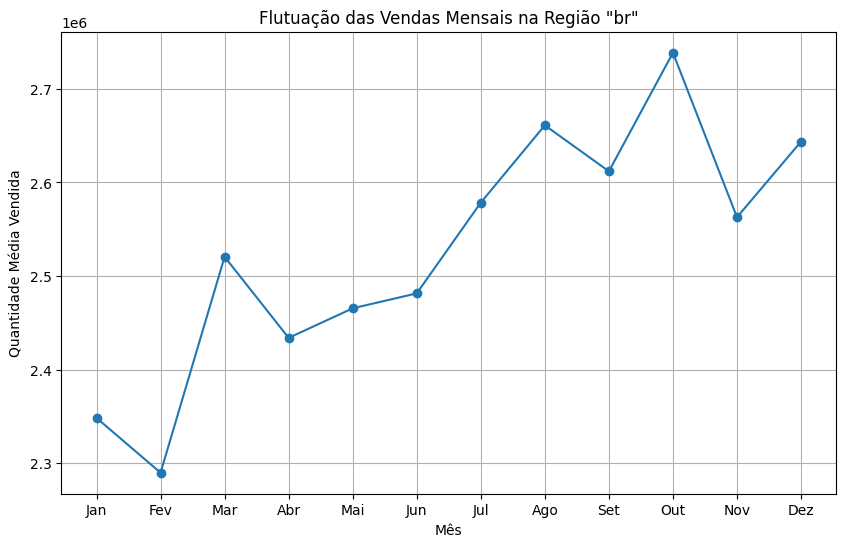

In [16]:
average_monthly_data = df_br.groupby('meses')['valor'].mean()

plt.figure(figsize=(10, 6))
plt.plot(average_monthly_data.index, average_monthly_data.values, marker='o', linestyle='-')
plt.xlabel('Mês')
plt.ylabel('Quantidade Média Vendida')
plt.title('Flutuação das Vendas Mensais na Região "br"')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.show()

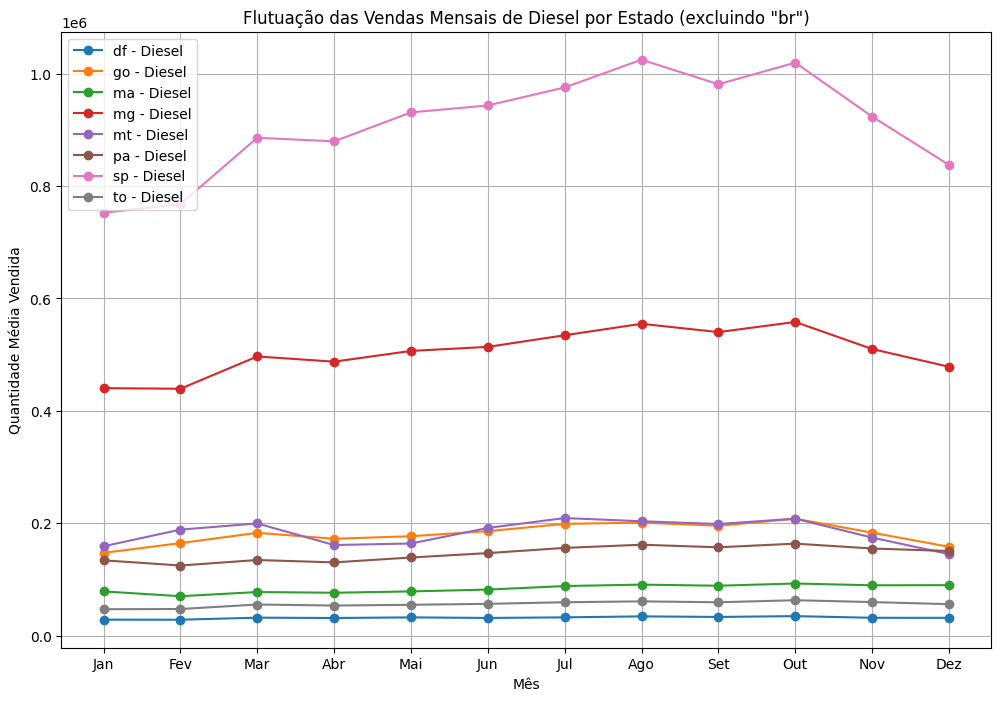

In [18]:
#Filtrar os dados para excluir a região 'br' e incluir apenas o tipo 'diesel'
df_d = df[(df['regiao'] != 'br') & (df['tipo'] == 'diesel')]

#Agrupar por estado e mês e calcular a quantidade média vendida
grouped_data = df_d.groupby(['regiao', 'meses'])['valor'].mean().reset_index()

states = grouped_data['regiao'].unique()

plt.figure(figsize=(12, 8))

for state in states:
    subset = grouped_data[grouped_data['regiao'] == state]
    plt.plot(subset['meses'], subset['valor'], marker='o', linestyle='-', label=f'{state} - Diesel')

plt.xlabel('Mês')
plt.ylabel('Quantidade Média Vendida')
plt.title('Flutuação das Vendas Mensais de Diesel por Estado (excluindo "br")')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True)
plt.show()

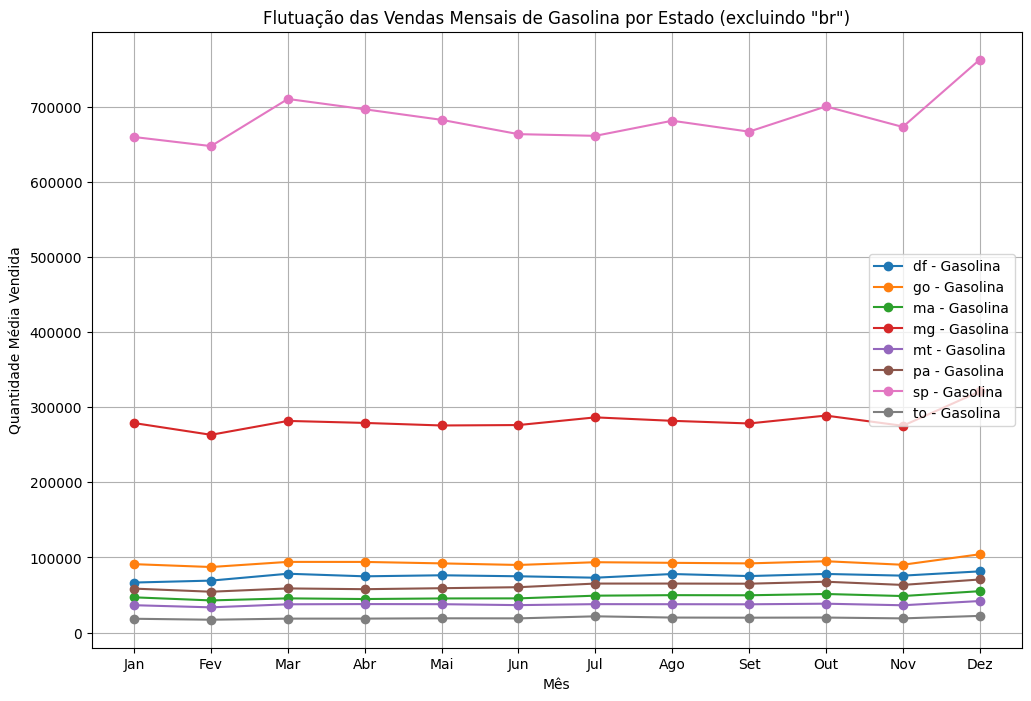

In [ ]:
df_g = df[(df['regiao'] != 'br') & (df['tipo'] == 'gasolina')]

grouped_data = df_g.groupby(['regiao', 'meses'])['valor'].mean().reset_index()

states = grouped_data['regiao'].unique()

plt.figure(figsize=(12, 8))

for state in states:
    subset = grouped_data[grouped_data['regiao'] == state]
    plt.plot(subset['meses'], subset['valor'], marker='o', linestyle='-', label=f'{state} - Gasolina')

plt.xlabel('Mês')
plt.ylabel('Quantidade Média Vendida')
plt.title('Flutuação das Vendas Mensais de Gasolina por Estado (excluindo "br")')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True)
plt.show()

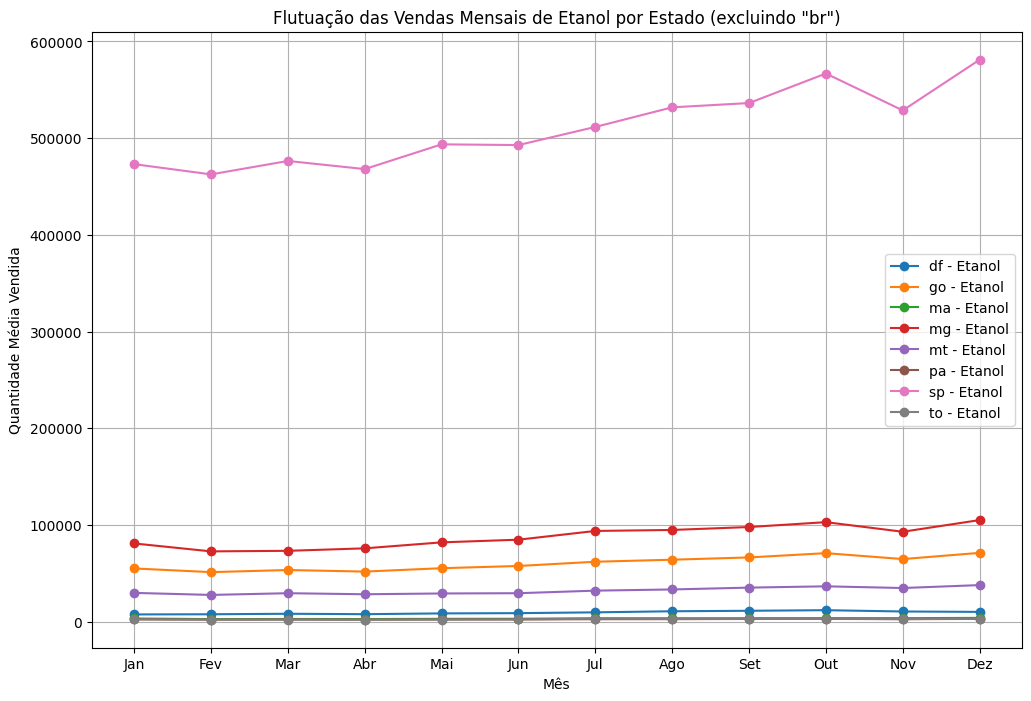

In [ ]:

df_e = df[(df['regiao'] != 'br') & (df['tipo'] == 'etanol')]

grouped_data = df_e.groupby(['regiao', 'meses'])['valor'].mean().reset_index()

states = grouped_data['regiao'].unique()

plt.figure(figsize=(12, 8))

for state in states:
    subset = grouped_data[grouped_data['regiao'] == state]
    plt.plot(subset['meses'], subset['valor'], marker='o', linestyle='-', label=f'{state} - Etanol')

plt.xlabel('Mês')
plt.ylabel('Quantidade Média Vendida')
plt.title('Flutuação das Vendas Mensais de Etanol por Estado (excluindo "br")')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.legend()
plt.grid(True)
plt.show()

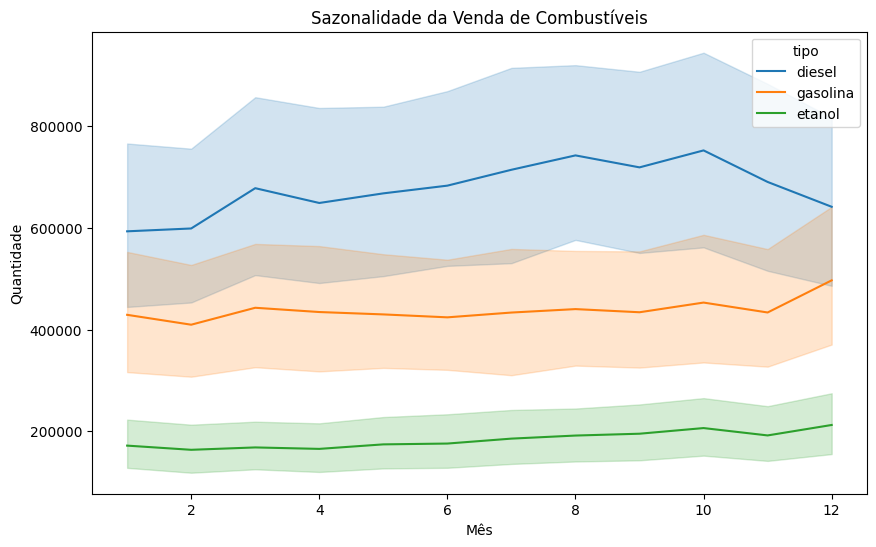

In [ ]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=df_total, x='meses', y='valor', hue='tipo')
plt.title('Sazonalidade da Venda de Combustíveis')
plt.xlabel('Mês')
plt.ylabel('Quantidade')
plt.show()

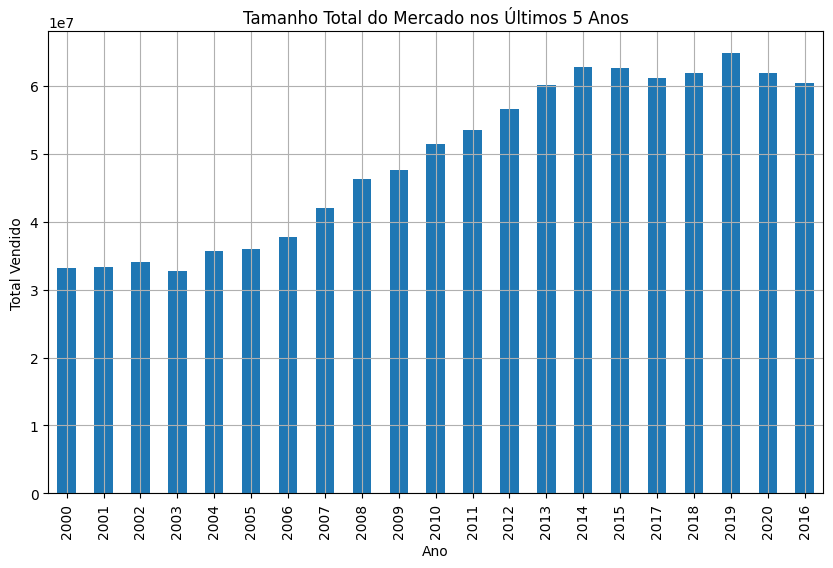

In [ ]:
market_size = df.groupby('ano')['valor'].sum()
market_size.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Ano')
plt.ylabel('Total Vendido')
plt.title('Tamanho Total do Mercado nos Últimos 5 Anos')
plt.grid(True)
plt.show()

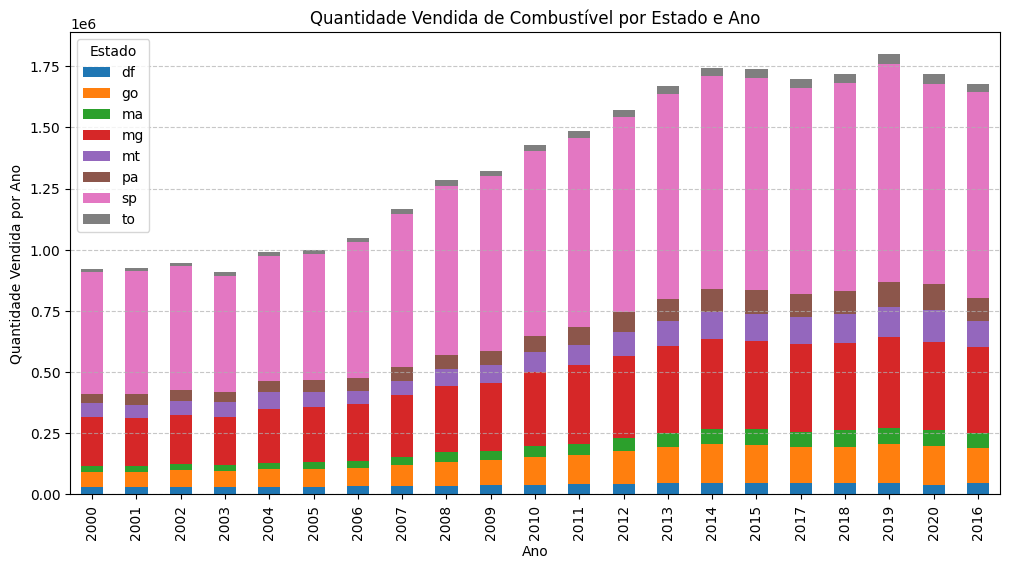

In [22]:
pivot_table = pd.pivot_table(df, values='valor', index='ano', columns='regiao', fill_value=0)

pivot_table.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.xlabel('Ano')
plt.ylabel('Quantidade Vendida por Ano')
plt.title('Quantidade Vendida de Combustível por Estado e Ano')
plt.legend(title='Estado')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()